# Приоретизация гипотез и анализ A/B-теста

## 1. Обзор данных

**Установки и обновления**

In [1]:
#!pip install plotly --upgrade --user

In [2]:
#pip install plotly

In [3]:
#pip install -U kaleido

**Импорты**

In [62]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy import stats as st
import plotly.io as pio

**Таблицы**

In [5]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visits = pd.read_csv('visitors.csv')

### Гипотезы

In [6]:
pd.set_option('display.max_colwidth', 200)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**С данными все в порядке**

### Заказы

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


**Предобработка:**
- Дату в datetime
- Дубликаты
- Проверить значения категориальных переменных (дата, группа)

### Посещения

In [10]:
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Предобработка:**
- Дату в datetime
- Дубликаты
- Проверить значения категориальных переменных (дата, группа)

## 2. Предобработка

### Заказы

**Меняем тип даты**

In [12]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

**Проверяем на дубликаты**

In [13]:
print('Дубликатов в таблице:', orders.duplicated().sum())

Дубликатов в таблице: 0


**Смотрим значения в категореальных переменных**

In [14]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [15]:
orders['date'].describe(datetime_is_numeric=True)

count                             1197
mean     2019-08-15 13:06:46.015037696
min                2019-08-01 00:00:00
25%                2019-08-08 00:00:00
50%                2019-08-15 00:00:00
75%                2019-08-23 00:00:00
max                2019-08-31 00:00:00
Name: date, dtype: object

**Все ок**

### Визиты

**Меняем тип даты**

In [16]:
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

**Проверяем на дубликаты**

In [17]:
print('Дубликатов в таблице:', visits.duplicated().sum())

Дубликатов в таблице: 0


**Смотрим значения в категореальных переменных**

In [18]:
visits['group'].unique()

array(['A', 'B'], dtype=object)

In [19]:
visits['date'].describe(datetime_is_numeric=True)

count                     62
mean     2019-08-16 00:00:00
min      2019-08-01 00:00:00
25%      2019-08-08 06:00:00
50%      2019-08-16 00:00:00
75%      2019-08-23 18:00:00
max      2019-08-31 00:00:00
Name: date, dtype: object

**Все ок**

## 3. Приоретизация гипотез

**Задачи:**
- Применить фреймворк ICE (по убыванию)
- Применить фреймворк RICE (по убыванию)
- Объяснить результаты и различия: изменилась ли приоретизация?


### ICE

In [20]:
#формула: Импакт * Конфиденс / Эффортс
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [21]:
hypothesis.sort_values(by='ICE', ascending=False)[['Hypothesis', 'ICE']].reset_index(drop=True)

,Hypothesis,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### RICE

In [22]:
#формула: Рич * Импэкт * Конфиденс / Эффортс
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [23]:
hypothesis.sort_values(by='RICE', ascending=False)[['Hypothesis', 'RICE','ICE']].reset_index(drop=True)

,Hypothesis,RICE,ICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.200000
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.000000
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.333333
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.000000
4,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.200000
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.125000
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.000000
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.333333
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.000000


**Выводы: чем отличаются результаты применения фреймворков?**

Фреймворк RICE учитывает в формуле охват пользователей, поэтому в отличие от ICE, он вывел на первые позиции гипотезы с формулировками "добавить на все основные страницы", "на сайт", "показать на главной". Гипотеза, оцененная как самая приоритетная по фреймворку ICE (Акция в день рождения), потеряла позиции в RICE по той же причине: охват таких пользователей гораздо меньше. 

## 4. Анализ A/B теста

### Кумулятивная выручка по группам

In [24]:
#выделим выручку по дням по каждой группе в два отдельных фрейма
revenueByDateA = orders.query('group == "A"')\
    .groupby('date', as_index=False)\
    .agg({'revenue':'sum'})

revenueByDateB = orders.query('group == "B"')\
    .groupby('date', as_index=False)\
    .agg({'revenue':'sum'})

In [25]:
#объединим данные в один фрейм для построения графика
revenueByDate = revenueByDateA.merge(revenueByDateB, on='date', suffixes=['A','B'])

In [26]:
#Посчитаем кумулятивную выручку по группам
revenueByDate['revenueA'] = revenueByDate['revenueA'].cumsum()
revenueByDate['revenueB'] = revenueByDate['revenueB'].cumsum()

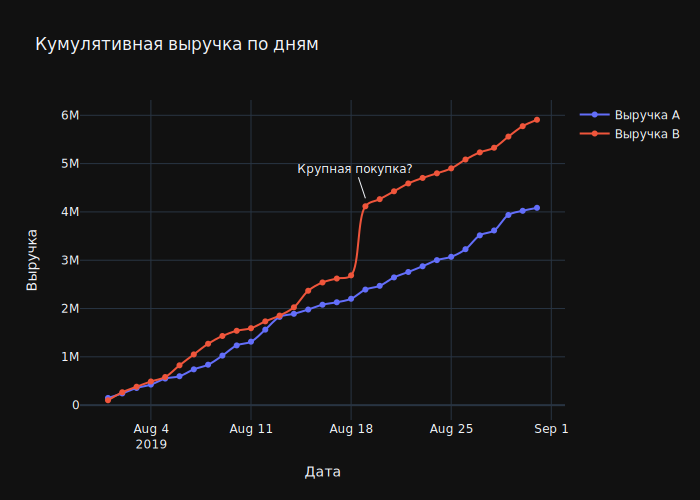

In [63]:
#строим график
fig = px.line(revenueByDate, 
        x='date', 
        y=['revenueA','revenueB'],
        markers=True,
        title='Кумулятивная выручка по дням',
        line_shape='spline',
        labels={'date':'Дата','value':'Выручка', 'legend':'Выручка', 'variable':''},
        template='plotly_dark')
fig.data[0].name = 'Выручка А'
fig.data[1].name = 'Выручка B'
fig.add_annotation(x='2019-08-19', y=4116541,
            text="Крупная покупка?",
            showarrow=True,
            yshift=8)
fig.show(renderer="svg")

**Выручку группы B искажает выборс**

Мы видим как кумулятивная выручка двух групп равномерно растет, но 19 августа происходит крупная покупка в группе B, которая смещает весь график вверх. 

### Кумулятивный средний чек по группам

In [28]:
#посчитаем количество покупок в каждой группе по датам и сохраним в отдельные фреймы
ordersByDateA = orders.query('group == "A"')\
    .groupby('date', as_index=False)\
    .agg({'visitorId':'count'})\
    .rename(columns={'visitorId':'orders'})

ordersByDateB = orders.query('group == "B"')\
    .groupby('date', as_index=False)\
    .agg({'visitorId':'count'})\
    .rename(columns={'visitorId':'orders'})

In [29]:
#объединим количество покупок по группам в один фрейм
ordersByDate = ordersByDateA.merge(ordersByDateB, on='date', suffixes=['A','B'])

In [30]:
#Посчитаем кумулятивное количество покупок по группам
ordersByDate['ordersA'] = ordersByDate['ordersA'].cumsum()
ordersByDate['ordersB'] = ordersByDate['ordersB'].cumsum()

In [31]:
#объединим фрейм кумулятивной выручки по группам с фреймом кумулятивного количества покупок
totalFrame = revenueByDate.merge(ordersByDate, on='date')

In [32]:
#посчиатем средний чек по группам
totalFrame['averageCheckA'] = totalFrame['revenueA'] / totalFrame['ordersA']
totalFrame['averageCheckB'] = totalFrame['revenueB'] / totalFrame['ordersB']

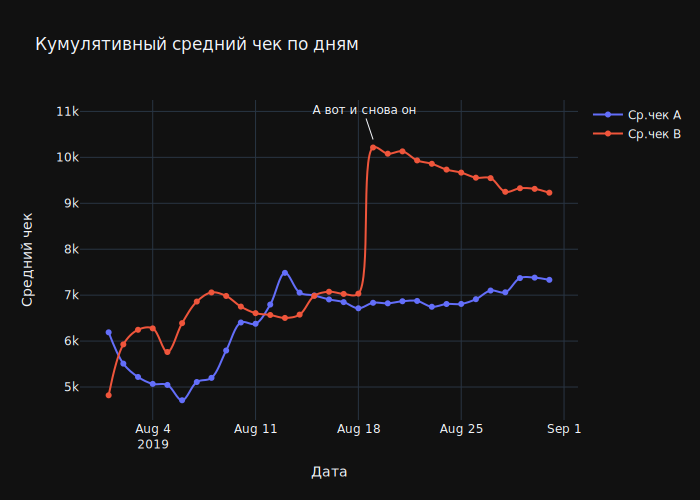

In [33]:
#строим график
fig = px.line(totalFrame, 
        x='date', 
        y=['averageCheckA','averageCheckB'],
        markers=True,
        title='Кумулятивный средний чек по дням',
        line_shape='spline',
        labels={'date':'Дата','value':'Средний чек', 'variable':''},
        template='plotly_dark')
fig.data[0].name = 'Ср.чек А'
fig.data[1].name = 'Ср.чек B'
fig.add_annotation(x='2019-08-19', y=10214.741935,
            text="А вот и снова он",
            showarrow=True,
            yshift=8)
fig.show("svg")

**Вывод**

Вплоть до 18 августа графики среднего чека не могут "устаканиться". После 18-го, кажется, они должны были стабилизироваться, но та крупная покупка 19 августа в группе B проявляет себя и смещает весь график. Какой-то вывод относительного того, есть ли изменения среднего чека по группам, на данный момент сделать сложно. 

### Относительное изменение кумулятивного среднего чека

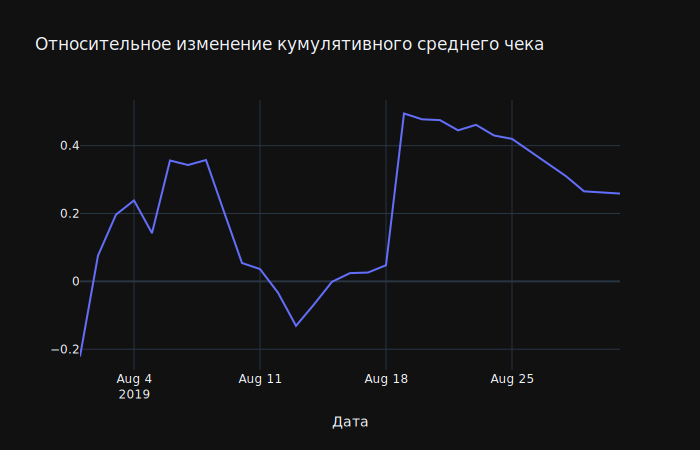

In [34]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=totalFrame['date'],
                         y=totalFrame['averageCheckB'] / totalFrame['averageCheckA'] - 1))

fig.update_layout(

    title='Относительное изменение кумулятивного среднего чека',
    template='plotly_dark',
    xaxis_title='Дата',
    height=450
    
)

fig.show("svg")

**Вывод**

По графику сейчас нельзя сделать вывод относительно того, в какой группе средний чек выше. В отличие от графика по выручке, график среднего чека (и относительного изменения среднего чека) скачет вплоть до 19 августа. Видимо - там есть аномальные значения (и не только 19 августа). 

### Кумулятивная конверсия по группам

In [35]:
#возьмем из таблицы с визитами отдельно посещения по группе А и В 
visitorsA = visits.query('group == "A"')[['date','visitors']].rename(columns={'visitors':'visitorsA'}).reset_index(drop=True)
visitorsB = visits.query('group == "B"')[['date','visitors']].rename(columns={'visitors':'visitorsB'}).reset_index(drop=True)

In [36]:
#добавим их в общий фрейм
totalFrame = totalFrame.merge(visitorsA, on='date').merge(visitorsB, on='date')

In [37]:
#посчитаем количество посетителей кумулятивно
totalFrame['visitorsA']= totalFrame['visitorsA'].cumsum()
totalFrame['visitorsB']= totalFrame['visitorsB'].cumsum()

In [38]:
#рассчитаем кумулятивную конверсию по группам
totalFrame['conversionA'] = totalFrame['ordersA'] / totalFrame['visitorsA']
totalFrame['conversionB'] = totalFrame['ordersB'] / totalFrame['visitorsB']

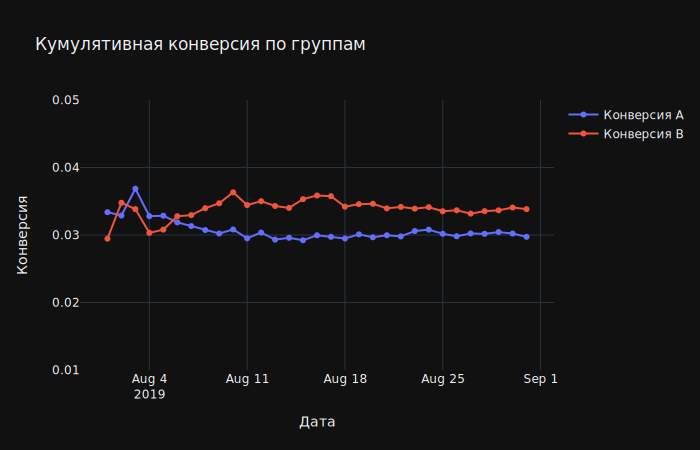

In [39]:
#строим график
fig = px.line(totalFrame, 
        x='date', 
        y=['conversionA','conversionB'],
        markers=True,
        title='Кумулятивная конверсия по группам',
        labels={'date':'Дата','value':'Конверсия', 'variable':''},
        template='plotly_dark',
        height=450)
fig.data[0].name = 'Конверсия А'
fig.data[1].name = 'Конверсия B'
fig.update_yaxes(range=[0.01, 0.05])
fig.show("svg")

**Вывод**

Конверсия выглядит достаточно ровной. Вначале графики колебались, но в итоге выровнялись и зафиксировались на примерно одном расстоянии друг от друга. Поскольку конверсия не учитывает сумму покупки, а берет в расчет только количество покупателей, и в итоге не показывает на графике аномалий, можно предположить, что аномалии именно в размерах конкретных покупок. 

### Относительное изменение кумулятивной конверсии

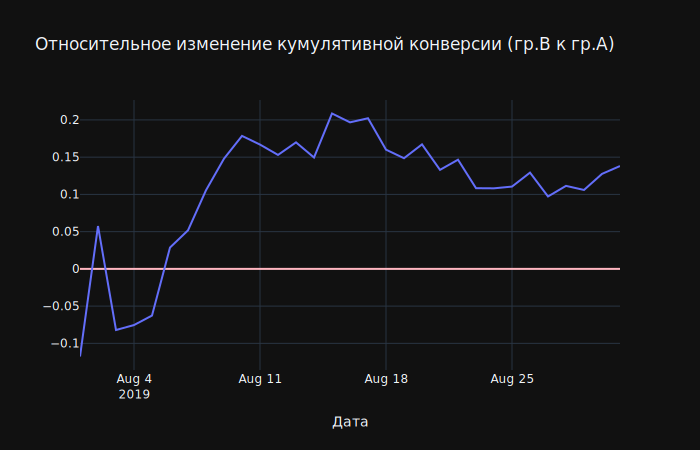

In [40]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=totalFrame['date'],
                         y=totalFrame['conversionB'] / totalFrame['conversionA'] - 1))

fig.update_layout(

    title='Относительное изменение кумулятивной конверсии (гр.B к гр.A)',
    template='plotly_dark',
    xaxis_title='Дата',
    height=450
    
)

fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')

fig.show("svg")

**Вывод**

В начале группа B проигрывала в конверсии, но начиная с 6 августа начала расти и в итоге зафиксировалась где-то между 0.1 и 0.15 ед.

### Количество заказов по пользователям

In [41]:
#для начала найдем количество заказов для каждого пользователя
ordersPerVisitor = orders.groupby('visitorId', as_index=False)\
    .agg({'revenue':'count'})\
    .rename(columns={'revenue':'orders'})

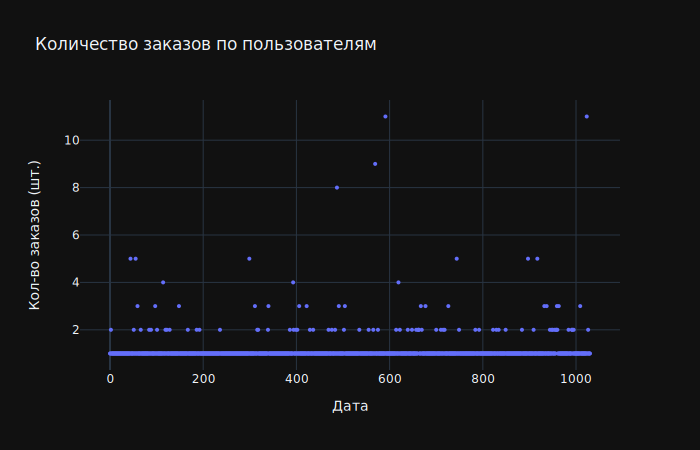

In [42]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(0, ordersPerVisitor.shape[0])),
                         y=ordersPerVisitor['orders'],
                         mode='markers',
                         marker_size=4))

fig.update_layout(

    title='Количество заказов по пользователям',
    template='plotly_dark',
    xaxis_title='Дата',
    yaxis_title='Кол-во заказов (шт.)',
    height=450
    
)

fig.show("svg")

**Чаще всего пользователи делают по 1 заказу в течение месяца.** Реже - 2. Больше 3 заказов происходит уже достаточно редко. 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и более точно выберем границу для определения аномальных пользователей.

In [43]:
print('95-й перцентиль: {:.0f} заказа'.format(np.percentile(ordersPerVisitor['orders'], [95, 99])[0]))
print('99-й перцентиль: {:.0f} заказа'.format(np.percentile(ordersPerVisitor['orders'], [95, 99])[1]))

95-й перцентиль: 2 заказа
99-й перцентиль: 4 заказа


### Стоимости заказов

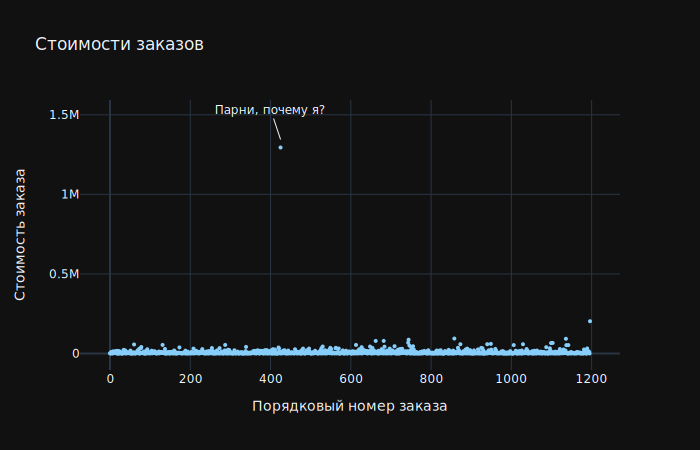

In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(0, orders.shape[0])),
                         y=orders['revenue'],
                         mode='markers',
                         marker=dict(color='LightSkyBlue', size=4)))

fig.update_layout(

    title='Стоимости заказов',
    template='plotly_dark',
    xaxis_title='Порядковый номер заказа',
    yaxis_title='Стоимость заказа',
    height=450
    
)

fig.add_annotation(x=425, y=orders['revenue'].max(),
            text="Парни, почему я?",
            showarrow=True,
            yshift=8)

fig.show("svg")

**Сразу видим один очень аномальный заказ под номером 425.** Из-за него масштаб графика становится неудобным для визуального рассмотрения. Приблизим график и увидим, что **стоимость основной массы находится до отметки в 50 тысяч.**

**Найдем 95-й и 99-й перцентили стоимости заказов**, чтобы точно выберать границу для определения аномальных заказов.

In [45]:
print('95-й перцентиль: {:.0f} у.е.'.format(np.percentile(orders['revenue'], 95)))
print('99-й перцентиль: {:.0f} у.е.'.format(np.percentile(orders['revenue'], 99)))

95-й перцентиль: 28000 у.е.
99-й перцентиль: 58233 у.е.


В общем-то так примерно и оказалось: лишь 1% заказов превышает стоимость в 58233 у.е.

### Статистическая значимость различий по сырым данным

#### Конверсия

- H0: Значимых различий в конверсии нет
- H1: Конверсия значимо различается
- Уровень значимости - 0.05

**Проверим значимость различий двумя способами:** 
- Критерием Манна-Уитни
- t-тестом

In [46]:
print('Критерий Манна-Уитни. P-value: {:.5f}'.format(st.mannwhitneyu(ordersByDateA['orders'] / visitorsA['visitorsA']
                                                                      ,ordersByDateB['orders'] / visitorsB['visitorsB'])[1]))
print('t-test. P-value: {:.5f}'.format(st.ttest_ind(ordersByDateA['orders'] / visitorsA['visitorsA']
                                                                      ,ordersByDateB['orders'] / visitorsB['visitorsB']).pvalue))

Критерий Манна-Уитни. P-value: 0.08587
t-test. P-value: 0.09229


In [47]:
print('Конверсия в группе A: {:.2%}'.format((ordersByDateA['orders'] / visitorsA['visitorsA']).mean()))
print('Конверсия в группе B: {:.2%}'.format((ordersByDateB['orders'] / visitorsB['visitorsB']).mean()))

Конверсия в группе A: 3.07%
Конверсия в группе B: 3.53%


**Вывод** 

1. Проверили разницу двух критериев оценки статистической значимости.  
2. На одном и том же уровне значимости оба критерия предлагают отклонять гипотезу.
3. Конверсия групп по "сырым" данным различается незначимо.

#### Средний чек

- H0: Значимых различий в среднем чеке группы А и группы B нет
- H1: Средний чек значимо различается
- Уровень значимости - 0.05

**Проверим значимость различий двумя способами:** 
- Критерием Манна-Уитни
- t-тестом

In [48]:
print('Критерий Манна-Уитни. P-value: {:.5f}'.format(st.mannwhitneyu(revenueByDateA['revenue'] / ordersByDateA['orders'],
                                                                     revenueByDateB['revenue'] / ordersByDateB['orders'])[1]))
print('t-test. P-value: {:.5f}'.format(st.ttest_ind(revenueByDateA['revenue'] / ordersByDateA['orders'],
                                                    revenueByDateB['revenue'] / ordersByDateB['orders']).pvalue))

Критерий Манна-Уитни. P-value: 0.40618
t-test. P-value: 0.39347


In [49]:
print('Средний чек в группе A: {:.2f}'.format((revenueByDateA['revenue'] / ordersByDateA['orders']).mean()))
print('Средний чек в группе B: {:.2f}'.format((revenueByDateB['revenue'] / ordersByDateB['orders']).mean()))

Средний чек в группе A: 7373.29
Средний чек в группе B: 9175.60


**Вывод:** 
1. Оба критерия говорят о том, что нулевую гипотезу нужно принять. Средний чек по "сырым" данным значимо не различается.
2. Это интересно - по графикам казалось иначе, да и средние значения тоже показывают большое различие.  

### Статистическая значимость различий по очищенным данным

Напомним 95 и 99 перцентили для стоимости заказа и количества заказов на пользователя

Стоимость заказа:
- 95-й перцентиль: 28000 у.е.
- 99-й перцентиль: 58233 у.е.

Количество заказов на 1 пользователя:
- 95-й перцентиль: 2 заказа
- 99-й перцентиль: 4 заказа

**Предлагаю для нашей задачи считать аномальными:** 
- пользователей, которые делают больше 3 заказов
- заказы, стоимость которых выше 58233 у.е.

*Предлагаю убрать именно сами заказы, а не пользователей, которые их делают, ведь эти же пользователи могли сделать и другие заказы, укладывающиеся в средние значения.*

#### Очистим данные от аномалий

In [50]:
#сделаем таблицу, в которой не будет аномальных заказов
ordersClear = orders.query('revenue <= 58233')

In [51]:
#найдем id пользователей, которые делают аномально много заказов и вытащим их в отдельный сериес
abnormalVisitorsId = ordersPerVisitor.query('orders >= 3')['visitorId']

In [52]:
#уберем из таблицы заказы пользователей из аномального списка
ordersClear = ordersClear.query('visitorId not in @abnormalVisitorsId')

#### Посчитаем выручку и количество заказов по очищенным данным

In [53]:
#выручка
clearRevenueByDateA = ordersClear.query('group =="A"')\
    .groupby('date', as_index=False)\
    .agg({'revenue':'sum'})\

clearRevenueByDateB = ordersClear.query('group =="B"')\
    .groupby('date', as_index=False)\
    .agg({'revenue':'sum'})

In [54]:
#количество заказов
clearOrdersByDateA = ordersClear.query('group =="A"')\
    .groupby('date', as_index=False)\
    .agg({'revenue':'count'})\
    .rename(columns={'revenue':'orders'})

clearOrdersByDateB = ordersClear.query('group =="B"')\
    .groupby('date', as_index=False)\
    .agg({'revenue':'count'})\
    .rename(columns={'revenue':'orders'})

#### Проверяем статистическую значимость

**Конверсия**

- H0: Значимых различий в конверсии нет
- H1: Конверсия значимо различается
- Уровень значимости - 0.05

In [55]:
print('Критерий Манна-Уитни. P-value: {:.5f}'.format(st.mannwhitneyu(clearOrdersByDateA['orders'] / visitorsA['visitorsA'],
                                                                     clearOrdersByDateB['orders'] / visitorsB['visitorsB'])[1]))
print('t-test. P-value: {:.5f}'.format(st.ttest_ind(clearOrdersByDateA['orders'] / visitorsA['visitorsA'],
                                                    clearOrdersByDateA['orders'] / visitorsB['visitorsB']).pvalue))

Критерий Манна-Уитни. P-value: 0.03124
t-test. P-value: 0.94093


In [56]:
print('Общая конверсия A: {:.2%}'.format(clearOrdersByDateA['orders'].sum() / visitorsA['visitorsA'].sum()))
print('Общая конверсия B: {:.2%}'.format(clearOrdersByDateB['orders'].sum() / visitorsB['visitorsB'].sum()))

Общая конверсия A: 2.57%
Общая конверсия B: 3.02%


**Выводы:**
- Очень интересно, как различаются p-значения по двум тестам
- Доверять будем критерию Манна-Уитни
- После очищения данных, p-value по Манна-Уитни показывает значимые различия

**Средний чек**

- H0: Значимых различий в среднем чеке нет
- H1: Средний чек значимо различается
- Уровень значимости - 0.05

In [57]:
print('Критерий Манна-Уитни. P-value: {:.5f}'.format(st.mannwhitneyu(clearRevenueByDateA['revenue'] / clearOrdersByDateA['orders'],
                                                                     clearRevenueByDateB['revenue'] / clearOrdersByDateB['orders'])[1]))
print('t-test. P-value: {:.5f}'.format(st.ttest_ind(clearRevenueByDateA['revenue'] / clearOrdersByDateA['orders'],
                                                    clearRevenueByDateB['revenue'] / clearOrdersByDateB['orders']).pvalue))

Критерий Манна-Уитни. P-value: 1.00000
t-test. P-value: 0.74204


In [58]:
print('Срдений чек A: {:.2f}'.format(clearRevenueByDateA['revenue'].sum() / clearOrdersByDateA['orders'].sum()))
print('Средний чек B: {:.2f}'.format(clearRevenueByDateB['revenue'].sum() / clearOrdersByDateB['orders'].sum()))

Срдений чек A: 6477.88
Средний чек B: 6316.95


**Посмотрим графики, чтобы проверить это визуально**

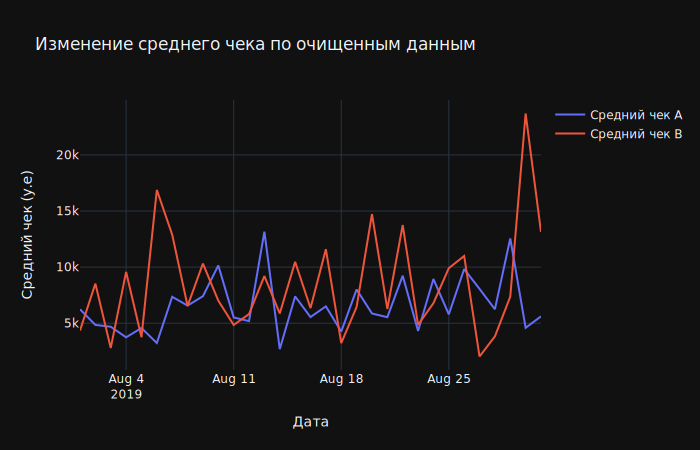

In [59]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=clearRevenueByDateA['date'],
                         y=clearRevenueByDateA['revenue'] / clearOrdersByDateA['orders'],
                         name="Средний чек А"))

fig.add_trace(go.Scatter(x=clearRevenueByDateB['date'],
                         y=clearRevenueByDateB['revenue'] / clearOrdersByDateA['orders'],
                         name="Средний чек B"))

fig.update_layout(

    title='Изменение среднего чека по очищенным данным',
    template='plotly_dark',
    xaxis_title='Дата',
    yaxis_title='Средний чек (у.е)',
    height=450
    
)

fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')

fig.show("svg")

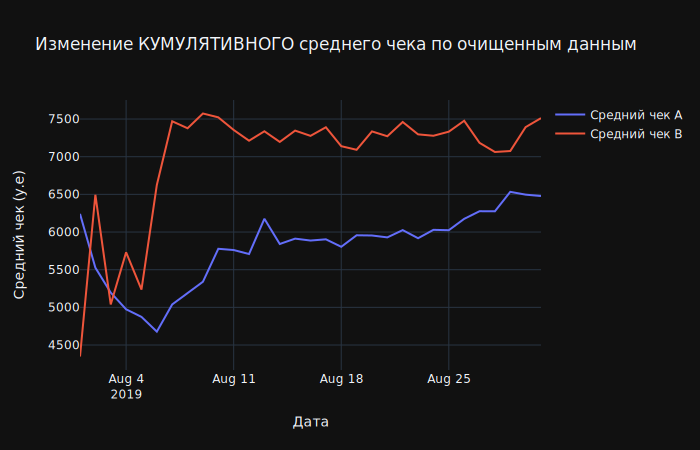

In [60]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=clearRevenueByDateA['date'],
                         y=clearRevenueByDateA['revenue'].cumsum() / clearOrdersByDateA['orders'].cumsum(),
                         name="Средний чек А"))

fig.add_trace(go.Scatter(x=clearRevenueByDateB['date'],
                         y=clearRevenueByDateB['revenue'].cumsum() / clearOrdersByDateA['orders'].cumsum(),
                         name="Средний чек B"))

fig.update_layout(

    title='Изменение КУМУЛЯТИВНОГО среднего чека по очищенным данным',
    template='plotly_dark',
    xaxis_title='Дата',
    yaxis_title='Средний чек (у.е)',
    height=450
    
)


fig.show("svg")

**Выводы:**
- После очищения данных, p-value стал еще больше
- Критерий Манна-Уитни дает основания говорить, что средний чек значимо не изменился
- Однако график кумулятивного среднего чека показывает различие чуть меньше, чем на тысячу и оба графика идут параллельно начиная с 7 августа. Это выглядит противоречиво.

## Итоговые выводы

В ходе проекта мы помогали интернет-магазину:
- приоритизировать гипотезы фреймворками RICE и ICE
- проанализировать результаты A/B теста

**Результаты. Приоритизация:**
- Результаты работы двух фреймворков по приоритизации гипотез различаются
- Гипотеза победитель по ICE - "Запустить акцию, дающую скидку на товар в день рождения"
- Гипотеза победитель по RICE - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

**Результаты. Анализ A/B теста:**
- Мы не увидели значимых изменений конверсии по сырым данным
- Зато по очищенным - конверсия изменилась значимо
- Абсолютное изменение конверсии - 17.5%
- Выводы по среднему чеку на сырых данных делать не имеет смысла (там были существенные выбросы)
- Средний чек по очищенным данным, судя по критерию Манна-Уитни, значимо не отличается
- Графики некумулятивного среднего чека "сплетаются" и тоже подтверждают это.  
- Так как графики конверсии стабилизировались, и группа В лучше группы А по конверсии, при равном среднем чеке, то и денег она приносит больше.
- **Тест успешный:** группа B показывает результаты лучше, чем группа А.